# Python-Highchartsのドリルダウンでポートフォリオを可視化する

Python-HighchartsはJavaScriptの可視化ライブラリHighchartsのPythonのラッパーです．<br>
Python-Highchartsを使うとインタラクティブに操作できるグラフを作成できます．

## 準備

はじめに，Python-Highchartsと今回使うライブラリをインポートします．

In [1]:
from itertools import product  # 投資比率パターン生成用
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from highcharts import Highchart
%matplotlib inline

ここでは，伝統的な4つの資産，国内株式，国内債券，外国株式，外国債券のインデックスに連動する投資信託への資産配分を考えます．
- 国内株式インデックスファンド
- 国内債券インデックスファンド
- 外国株式インデックスファンド
- 外国債券インデックスファンド

事前にこれらの資産の時系列データから週次のリターンの平均と共分散行列を計算しておきます．(＊数値は一例です．用いた数値に一切責任は負いません．)

In [2]:
asset_list = ['国内株式', '国内債券', '外国株式', '外国債券']

In [3]:
mean = pd.Series([0.001487, 0.000283, 0.001905, 0.000723], index=asset_list, name='expected return')
mean

国内株式    0.001487
国内債券    0.000283
外国株式    0.001905
外国債券    0.000723
Name: expected return, dtype: float64

In [4]:
cov = pd.DataFrame([[7.95021e-04, -2.4461e-05, 6.06600e-04, 2.00937e-04],
                    [ -2.4461e-05, 8.485e-06, -2.1082e-05, -9.016e-06],
                    [  6.06600e-04, -2.1082e-05, 8.82778e-04, 2.15332e-04],
                    [  2.00937e-04, -9.016e-06, 2.15332e-04, 1.38414e-04]]
                   , index=asset_list, columns=asset_list)
cov

,国内株式,国内債券,外国株式,外国債券
国内株式,0.000795,-0.000024,0.000607,0.000201
国内債券,-0.000024,0.000008,-0.000021,-0.000009
外国株式,0.000607,-0.000021,0.000883,0.000215
外国債券,0.000201,-0.000009,0.000215,0.000138


シャープレシオ（リスクフリーレートは考慮しない）も計算してみます．

In [5]:
std = pd.Series(np.sqrt(np.diag(np.array(cov))), index=asset_list, name='expected volatility')
df = pd.concat([mean, std], axis=1)
df['sharpe ratio'] = mean / std
df.T

,国内株式,国内債券,外国株式,外国債券
expected return,0.001487,0.000283,0.001905,0.000723
expected volatility,0.028196,0.002913,0.029712,0.011765
sharpe ratio,0.052738,0.097154,0.064116,0.061454


4つの資産の平均と標準偏差をmatplotlibでプロットしてみます．

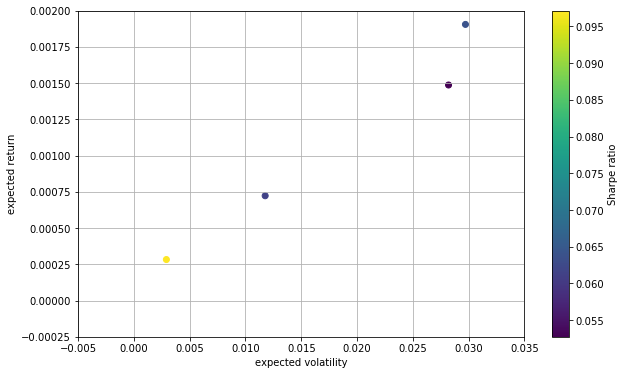

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(std, mean, c=df.loc[:, 'expected return']/df.loc[:, 'expected volatility'], marker='o')
plt.grid(True)
plt.xlim(-0.005, 0.035)
plt.ylim(-0.00025, 0.002)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
#plt.savefig('risk_returen_matplotlib.png')

## matplotlibで可視化する(比較用)

投資比率のパターンをたくさん作り，ポートフォリオの期待リターンと標準偏差を計算します．<br>
ランダムに作成した例とitertoolsを使った例を載せます．どちらか選択して実行してください．

- ランダムに投資比率のパターンを作ってみる

投資比率のパターンをたくさん作り，ポートフォリオの期待リターンと標準偏差を計算します．

In [7]:
prets = []
pvols = []
weights_list = []  # highcharts用
for p in range(500):
    weights = np.random.randint(low=0, high=11, size=len(asset_list))
    weights = weights / np.sum(weights)
    weights_name = [[_i, _j] for _i, _j in zip(asset_list, weights)]  # highcharts用
    weights_list += [weights_name]  # highcharts用
    prets.append(np.sum(mean * weights))
    pvols.append(np.sqrt(np.dot(weights.T,np.dot(cov,weights))))

資産の組み合わせごとのリスク（標準偏差）と期待リターンをプロットし，色でシャープレシオの大きさを表します．

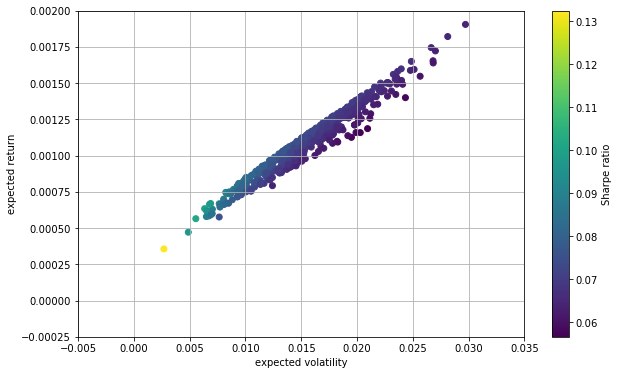

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=np.array(prets)/np.array(pvols), marker='o')
plt.grid(True)
plt.xlim(-0.005, 0.035)
plt.ylim(-0.00025, 0.002)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

- itertoolsのproductを使って投資比率のパターンを作ってみる

投資比率のパターンをたくさん作ります．

In [9]:
weights = np.linspace(0, 1, 5)
weights = product(weights, repeat=4)
weights = pd.DataFrame(list(weights)[1:], columns=asset_list)
weights = weights.divide(weights.sum(axis=1), axis=0)
weights = weights.drop_duplicates()

In [10]:
weights

,国内株式,国内債券,外国株式,外国債券
0,0.000000,0.000000,0.000000,1.000000
4,0.000000,0.000000,1.000000,0.000000
5,0.000000,0.000000,0.500000,0.500000
6,0.000000,0.000000,0.333333,0.666667
7,0.000000,0.000000,0.250000,0.750000
8,0.000000,0.000000,0.200000,0.800000
10,0.000000,0.000000,0.666667,0.333333
12,0.000000,0.000000,0.400000,0.600000
15,0.000000,0.000000,0.750000,0.250000
16,0.000000,0.000000,0.600000,0.400000


ポートフォリオの期待リターンと標準偏差を計算します．

In [11]:
prets = list((weights * mean).sum(axis=1))
pvols = []
for _num, _ix in enumerate(weights.index):
    w = weights.loc[_ix, :]
    pvols += [np.sqrt(np.dot(w.T, np.dot(cov, w)))]

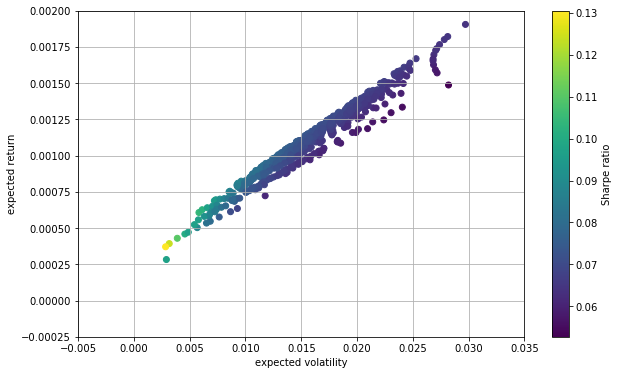

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=np.array(prets)/np.array(pvols), marker='o')
plt.grid(True)
plt.xlim(-0.005, 0.035)
plt.ylim(-0.00025, 0.002)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
#plt.savefig('efficient_frontier_matplotlib.png')

## Highchartsで可視化する

Python-Highchartsを使うとインタラクティブで見栄えの良いグラフを作れます．

In [13]:
options = {
    'title': {
        'text': 'リスクとリターン'
    },
    'xAxis': {
        'title': {
            'text': 'リスク'
        }
    },
    'yAxis': {
        'title': {
            'text': 'リターン'
        }
    },
    'chart': {
        'type': 'scatter',
    },
    'plotOptions': {
        'scatter': {
            'marker': {
                'radius': 4,
                'symbol': 'circle',
                'states': {
                    'hover': {
                        'enabled': True,
                        'lineColor': 'rgb(100,100,100)'
                    }
                }
            },
            'states': {
                'hover': {
                    'marker': {
                        'enabled': False
                    }
                }
            },
            'tooltip': {
                'headerFormat': '<b>{series.name}</b><br>',
                'pointFormat': 'risk :{point.x} <br> return:{point.y} '
            }
        }
    }
}
H = Highchart()
H.set_dict_options(options)
data = list(zip(pvols, prets))
weights_data = []
for i in range(len(weights)):
    weights_data += [{'x':data[i][0] ,'y': data[i][1], 'drilldown': 'portfolio'+str(i), 'name': 'portfolio'+str(i)}]
    # 'drilldown'と'name'はドリルダウン用
weights_data
H.add_data_set(weights_data, 'scatter', 'ポートフォリオ')

In [14]:
H

## 投資比率をドリルダウンで表示してみる

各リスク・リターンのプロットを実現する投資比率が分かるドリルダウンを加えてみます．

In [15]:
# itertoolsを使ったとき用
weights_list = []
for _num, _ix in enumerate(weights.index):
    weights_name = [[_i, _j] for _i, _j in zip(asset_list, weights.loc[_ix, :])]
    weights_list += [weights_name]

In [16]:
for i in range(len(weights)):
    H.add_drilldown_data_set(weights_list[i], 'pie', weights_data[i]['name'], name=weights_data[i]['name'])

In [17]:
H

ポートフォリオ最適化と組み合わせるなど，資産配分決定にご活用ください．